In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# 1. Dataset

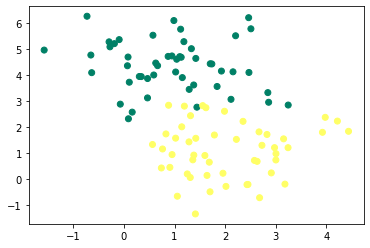

In [38]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

# 2. Fonctions du modele

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [5]:
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [6]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [7]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [27]:
def predict(X, W, b):
    A = model(X, W, b)
#     print(A)
    return A >= 0.5

In [9]:
from sklearn.metrics import accuracy_score

In [36]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return (W, b)
# pour nommer les classes 
def g(x):
    return 1 if x==True else 0
    

0.92


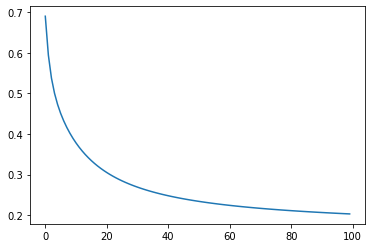

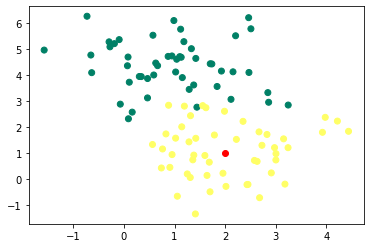

sa classe est : 1


In [37]:
W, b = artificial_neuron(X, y)
y_pred = predict(np.array([2,1]), W, b)
# on va essayer de classer (ou predire une classe) l'element dont les coordonnes sont (2,1)
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(2, 1, c='red', cmap='summer')
plt.show()
print("sa classe est :",g(y_pred))

# 3. Frontiere de décision

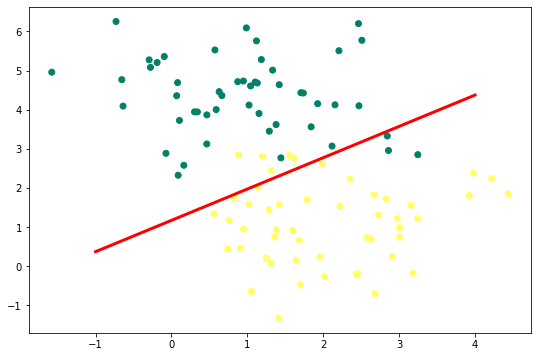

In [31]:
# on va tracer la droite qu'on a trouve dont les parametres sont W et b.
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - W[0] * x1 - b) / W[1]

ax.plot(x1, x2, c='red', lw=3)

In [39]:
# vous pouvez consulter les detailles sur la chaine youtube : machine learnia